<a href="https://colab.research.google.com/github/Kee-Keerthi002/Recommendation-System-for-Retail-Stores/blob/main/Recommendation_Systems_for_Retail_Stores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from collections import defaultdict
import time

In [ ]:
start_time = time.time()

df = pd.read_csv("Product for Recomm System.csv", names=["UserID", "ProductId", "Rating", "Timestamp"])
df.head()

computational_time = time.time() - start_time
print('Done in %0.3fs' %(computational_time))

Done in 1.077s


<ipython-input-56-ad808a1ed6f0>:3: DtypeWarning: Columns (2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Product for Recomm System.csv", names=["UserID", "ProductId", "Rating", "Timestamp"])


In [ ]:
df.head()

,UserID,ProductId,Rating,Timestamp
0,UserID,ProductId,Rating,Timestamp
1,A2CX7LUOHB2NDG,321732944,5,1341100800
2,A2NWSAGRHCP8N5,439886341,1,1367193600
3,A2WNBOD3WNDNKT,439886341,3,1374451200
4,A1GI0U4ZRJA8WN,439886341,1,1334707200


In [ ]:
df.tail()

,UserID,ProductId,Rating,Timestamp
1048571,A1H16CBCNEL4G3,B000IF51UQ,5,1356739200
1048572,A1C2OANTC49AQI,B000IF51UQ,5,1382486400
1048573,A2JL0387FDDFS,B000IF51UQ,5,1340409600
1048574,A2KIYE5RF0OEMY,B000IF51UQ,4,1391212800
1048575,A1G9Q5UJ5Y7DES,B000IF51UQ,2,1390780800


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048576 entries, 0 to 1048575
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   UserID     1048576 non-null  object
 1   ProductId  1048576 non-null  object
 2   Rating     1048576 non-null  object
 3   Timestamp  1048576 non-null  object
dtypes: object(4)
memory usage: 32.0+ MB


In [ ]:
rows_count, columns_count = df.shape
print('Total Number of rows :', rows_count)
print('Total Number of columns :', columns_count)

Total Number of rows : 1048576
Total Number of columns : 4


In [ ]:
df.dtypes

UserID       object
ProductId    object
Rating       object
Timestamp    object
dtype: object

In [ ]:
unique_userId = df['UserID'].nunique()
unique_productId = df['ProductId'].nunique()
print('Total number of unique Users    : ', unique_userId)
print('Total number of unique Products : ', unique_productId)

Total number of unique Users    :  786330
Total number of unique Products :  61894


<Axes: >

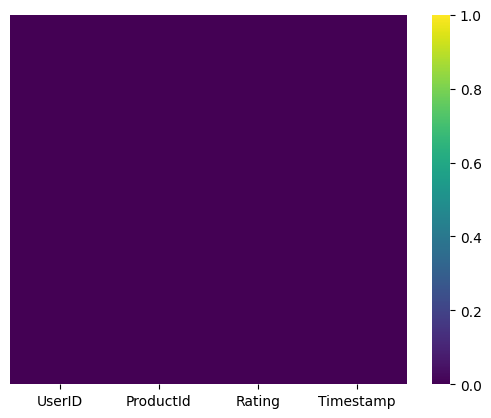

In [ ]:
import seaborn as sns
import pandas as pd

df = pd.read_csv('Product for Recomm System.csv')

sns.heatmap(df.isna(), yticklabels=False, cbar=True, cmap='viridis')

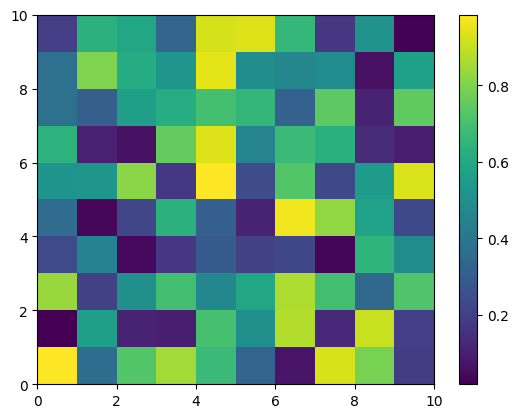

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

data = np.random.rand(10, 10)

plt.pcolormesh(data, cmap='viridis')
plt.colorbar()
plt.show()


In [ ]:
df.apply(lambda x : sum(x.isnull()))

UserID       0
ProductId    0
Rating       0
Timestamp    0
dtype: int64

In [ ]:
df.isnull().sum()

UserID       0
ProductId    0
Rating       0
Timestamp    0
dtype: int64

In [ ]:
df.isna().any()

UserID       False
ProductId    False
Rating       False
Timestamp    False
dtype: bool

In [ ]:
df_transpose = df.describe().T
df_transpose

,count,unique,top,freq
UserID,1048576,786330,A5JLAU2ARJ0BO,412
ProductId,1048576,61894,B0002L5R78,9487
Rating,1048576,11,5,493376
Timestamp,1048576,10013,1168300800,5415


In [ ]:
df_transpose[['count', 'unique', 'top', 'freq']]

,count,unique,top,freq
UserID,1048576,786330,A5JLAU2ARJ0BO,412
ProductId,1048576,61894,B0002L5R78,9487
Rating,1048576,11,5,493376
Timestamp,1048576,10013,1168300800,5415


In [ ]:
df["Rating"].unique()

array(['Rating', '5', '1', '3', '2', '4', 4, 5, 1, 3, 2], dtype=object)

<Axes: >

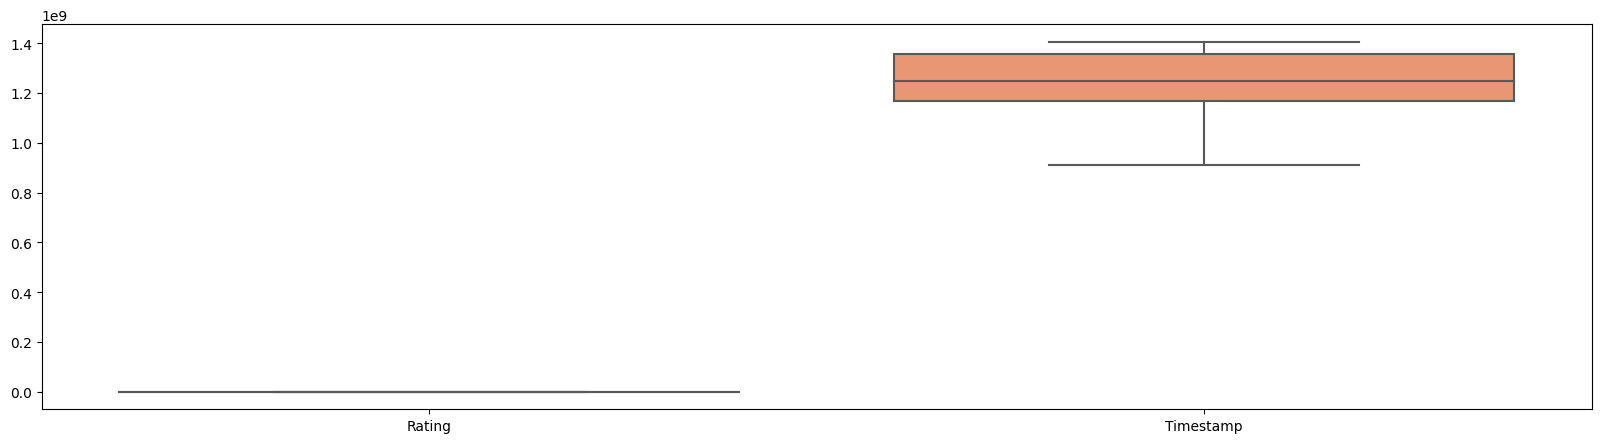

In [ ]:
df = pd.read_csv("Product for Recomm System.csv")

plt.figure(figsize=(20,5))
sns.boxplot(data=df, orient='v', palette='Set2', dodge=False)

Done in 10.849s


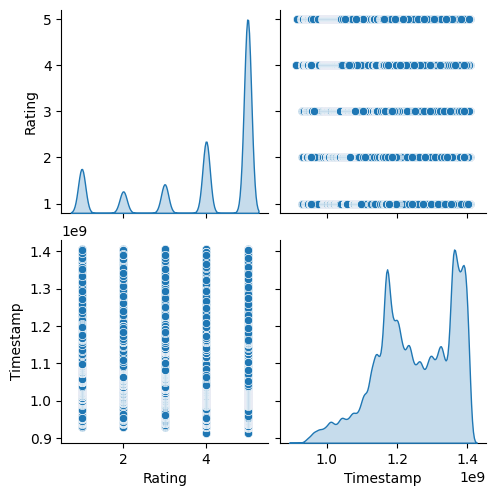

In [ ]:
start_time = time.time()

sns.pairplot(df, diag_kind= 'kde')

computational_time = time.time() - start_time
print('Done in %0.3fs' %(computational_time))

In [ ]:
df['Rating'].value_counts()

5    565636
4    208535
1    128251
3     83509
2     62644
Name: Rating, dtype: int64

In [ ]:
rating_counts = pd.DataFrame(df['Rating'].value_counts()).reset_index()
rating_counts.columns = ['Labels', 'Ratings']
rating_counts

,Labels,Ratings
0,5,565636
1,4,208535
2,1,128251
3,3,83509
4,2,62644


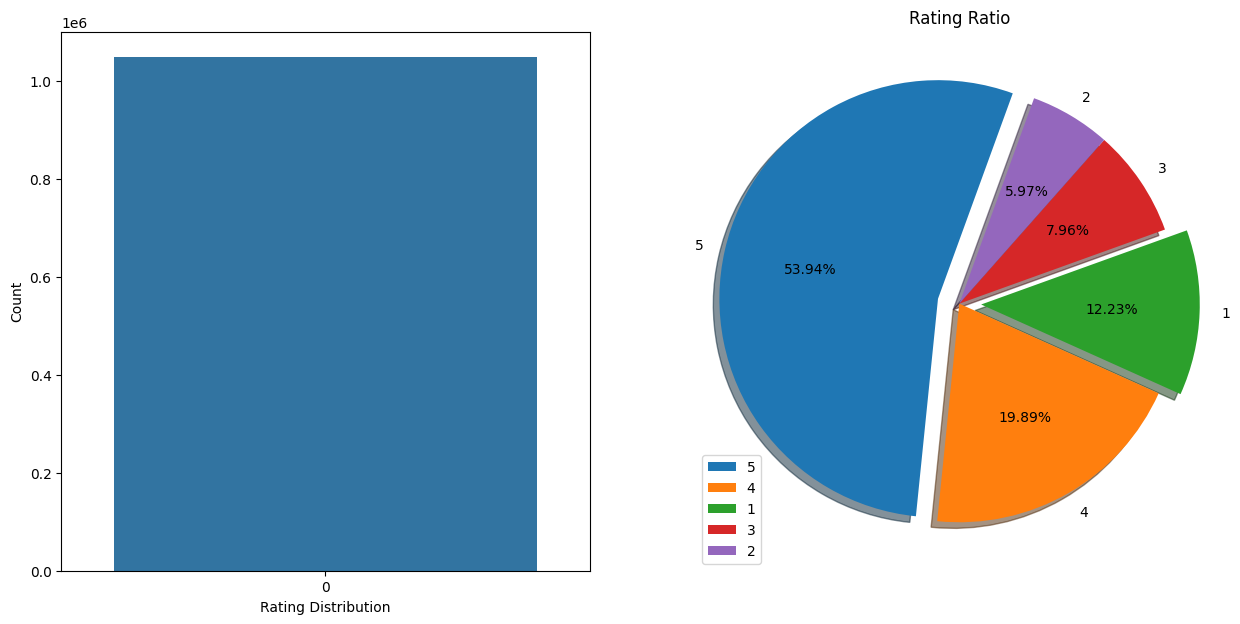

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15,7))
sns.countplot(df['Rating'], ax=ax1)
ax1.set_xlabel('Rating Distribution', fontsize=10)
ax1.set_ylabel('Count', fontsize=10)


explode = (0.1, 0, 0.1, 0, 0)
ax2.pie(rating_counts["Ratings"], explode=explode, labels=rating_counts.Labels, autopct='%1.2f%%',
        shadow=True, startangle=70)
ax2.axis('equal')
plt.title("Rating Ratio")
plt.legend(rating_counts.Labels, loc=3)
plt.show()

In [ ]:
df.corr()

<ipython-input-98-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Rating,Timestamp
Rating,1.000000,0.093072
Timestamp,0.093072,1.000000


<ipython-input-103-ec64fb401e3d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.zeros_like(df.corr(), dtype=np.bool)
<ipython-input-103-ec64fb401e3d>:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(df.corr(), dtype=np.bool)
<ipython-input-103-ec64fb401e3d>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this 

<Axes: title={'center': 'Correlation of Attributes'}>

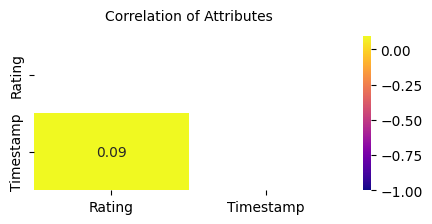

In [ ]:
mask = np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(5,2))
plt.title('Correlation of Attributes', y=1.05, size=10)
sns.heatmap(df.corr(),vmin=-1, cmap='plasma',annot=True,  mask=mask, fmt='.2f')

In [ ]:
df = df.drop(['Timestamp'], axis=1)

In [ ]:
df1 = df.copy()

In [ ]:
df1.head()

,UserID,ProductId,Rating
0,A2CX7LUOHB2NDG,321732944,5
1,A2NWSAGRHCP8N5,439886341,1
2,A2WNBOD3WNDNKT,439886341,3
3,A1GI0U4ZRJA8WN,439886341,1
4,A1QGNMC6O1VW39,511189877,5


In [ ]:
users_counts = df1['UserID'].value_counts().rename('users_counts')
users_data   = df1.merge(users_counts.to_frame(),
                                left_on='UserID',
                                right_index=True)

In [ ]:
subset_df = users_data[users_data.users_counts >= 50]
subset_df.head()


,UserID,ProductId,Rating,users_counts
2161,A5JLAU2ARJ0BO,1400532655,1,412
32735,A5JLAU2ARJ0BO,B00003006R,5,412
35086,A5JLAU2ARJ0BO,B00003G1RG,3,412
38344,A5JLAU2ARJ0BO,B00004S9AK,5,412
40410,A5JLAU2ARJ0BO,B00004SB92,4,412


In [ ]:
product_rating_counts = subset_df['ProductId'].value_counts().rename('product_rating_counts')
product_rating_data   = subset_df.merge(product_rating_counts.to_frame(),
                                left_on='ProductId',
                                right_index=True
                                        )

In [ ]:
product_rating_data = product_rating_data[product_rating_data.product_rating_counts > 10]
product_rating_data.head()

,UserID,ProductId,Rating,users_counts,product_rating_counts
